In [28]:
import sys
sys.path.append(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\module_memoire")

import pandas as pd
from exploratory_analysis import *
from dependency_plot import *
from to_compute_model import *
from to_concatenate import *
from to_display_data import *
from to_resample import *
from preprocessing import *
from evaluation import *
from joblib import dump,load

from scipy.stats import kurtosis

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, StratifiedKFold

In [29]:
data=import_data(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\full_data.csv")

In [41]:
model_resume=import_data(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\model_resume.csv")

In [30]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [31]:
df=data.copy()

In [32]:
for col in df.select_dtypes("object"):
    df=to_encoded(df,col)

In [33]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


# Split

In [34]:
x_train,x_test, y_train, y_test=separation_of_train_test(df,"stroke",size_=0.3)

In [35]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1950,0,29.0,0,0,1,1,1,81.20,23.0,0
4766,1,13.0,0,0,0,3,1,82.38,24.3,0
4190,0,56.0,0,0,1,0,1,86.07,32.5,0
663,1,30.0,0,0,1,2,0,95.01,32.3,3
2974,0,70.0,0,0,1,1,1,90.49,28.9,1
...,...,...,...,...,...,...,...,...,...,...
468,0,54.0,0,0,1,1,1,129.16,32.4,2
3285,0,49.0,0,0,1,1,0,85.23,25.4,0
3468,1,8.0,0,0,0,3,0,121.99,19.6,0
4745,0,35.0,0,0,1,1,0,58.72,40.0,3


# Standardization

In [36]:
standar_train=x_train[["age","avg_glucose_level","bmi"]]
standar_test=x_test[["age","avg_glucose_level","bmi"]]
standar_train,scaler=to_standardized(standar_train)
standar_test=scaler.transform(standar_test)
standar_test=pd.DataFrame(standar_test,columns=standar_train.columns)
x_train=to_concatenate(x_train,standar_train)
x_test=to_concatenate(x_test,standar_test)

In [37]:
scaler

MinMaxScaler()

# features selection seuil=0.05

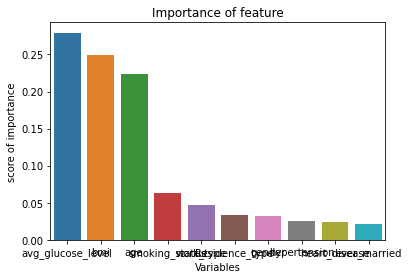

In [38]:
x_train,x_test=features_selection(x_train,x_test,y_train,seuil=0.05)

In [39]:
x_train

,avg_glucose_level,bmi,age,smoking_status
0,0.122649,0.255747,0.353027,0
1,0.128198,0.293103,0.157715,0
2,0.145551,0.528736,0.682617,0
3,0.187594,0.522989,0.365234,3
4,0.166337,0.425287,0.853516,1
...,...,...,...,...
3481,0.348194,0.525862,0.658203,2
3482,0.141601,0.324713,0.597168,0
3483,0.314475,0.158046,0.096680,0
3484,0.016930,0.744253,0.426270,3


# Model

In [42]:
model=compute_model("rdf",x_train,y_train)
sum_up=evaluation_of_model(model,x_test,y_test,"RandomForest_28_06",model_resume)

Do you want to enter the params. Y/Nn
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1421
           1       0.14      0.89      0.24        74

    accuracy                           0.72      1495
   macro avg       0.57      0.80      0.54      1495
weighted avg       0.95      0.72      0.80      1495



In [43]:
x_test_resampled,y_test_resampled,resampler=resampling_data(x_test,y_test,"SMOTE") # smote

In [44]:
sum_up=evaluation_of_model(model,x_test_resampled,y_test_resampled,"Random_data_smoted_28_06",model_resume)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1421
           1       0.76      0.92      0.83      1421

    accuracy                           0.82      2842
   macro avg       0.83      0.82      0.81      2842
weighted avg       0.83      0.82      0.81      2842



# Definition of model with the best parameter of grid search

In [46]:
seed=1234
class_weight=y_train[y_train==0].size/y_train[y_train==1].size
model_random=RandomForestClassifier(n_estimators=500,min_samples_split=10,max_leaf_nodes=2,max_depth=20,class_weight={0:1,1:class_weight},random_state=seed,n_jobs=-1)

In [47]:
model_random.fit(x_train,y_train)

y_pred=model_random.predict(x_test)

# Test with umbalanced data

In [48]:
print(classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1421
           1       0.14      0.89      0.24        74

    accuracy                           0.72      1495
   macro avg       0.57      0.80      0.54      1495
weighted avg       0.95      0.72      0.80      1495



# Test with smoted data

In [49]:
y_pred_sampled=model_random.predict(x_test_resampled)

In [50]:
print(classification_report(y_test_resampled,y_pred_sampled) )

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1421
           1       0.76      0.92      0.83      1421

    accuracy                           0.82      2842
   macro avg       0.83      0.82      0.81      2842
weighted avg       0.83      0.82      0.81      2842



1

In [20]:
print(classification_report(y_test_resampled,y_pred_sampled))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1421
           1       0.76      0.92      0.83      1421

    accuracy                           0.82      2842
   macro avg       0.83      0.82      0.81      2842
weighted avg       0.83      0.82      0.81      2842



In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_resampled,y_pred_sampled)

0.8163265306122449

# Cross-validation

In [11]:
def apply_cross_validation(model, X_train, y_train, n_splits=10):
    
    assert n_splits >=2, "n_splits doit être supérieur ou égal à 2."
    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import StratifiedKFold
    
    if model is None:
        model = RandomForestClassifier(n_estimators=500,min_samples_split=10,max_leaf_nodes=2,max_depth=20,class_weight={0:1,1:class_weight},random_state=seed,n_jobs=-1)
    
    # define model evaluation method
    cross_val = StratifiedKFold(n_splits=n_splits,
                              random_state=1234,shuffle=True)
    # evaluate model
    cv_results =\
        cross_validate(model, X_train, y_train, 
                       return_estimator=True, return_train_score=True,
                       scoring=('f1', 'roc_auc','precision'), 
                       cv=cross_val, n_jobs=-1)
    
    return cv_results

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [12]:
X=df[x_train.columns]
y=df["stroke"]

In [13]:
X.head()

,avg_glucose_level,bmi,age,smoking_status
0,228.69,36.6,67.0,1
1,105.92,32.5,80.0,2
2,171.23,34.4,49.0,3
3,174.12,24.0,79.0,2
4,186.21,29.0,81.0,1


In [30]:
help(to_concatenate)

Help on function to_concatenate in module to_concatenate:

to_concatenate(df1, df2, list_of_var=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
    list_of_var : list (list of var of df1)
    df1 : pd.DataFrame. 
    df2 : pd.DataFrame
    
    return x_final : pd.DataFrame



In [32]:
X

,avg_glucose_level,bmi,age,smoking_status
0,228.69,36.6,67.0,1
1,105.92,32.5,80.0,2
2,171.23,34.4,49.0,3
3,174.12,24.0,79.0,2
4,186.21,29.0,81.0,1
...,...,...,...,...
4976,70.15,29.8,41.0,1
4977,191.15,31.1,40.0,3
4978,95.02,31.8,45.0,3
4979,83.94,30.0,40.0,3


In [14]:
X_to_standard=X[["age","avg_glucose_level","bmi"]]
X_transformed=scaler.transform(X_to_standard)

In [15]:
X_transformed=pd.DataFrame(data=X_transformed,columns=X_to_standard.columns)

In [16]:
X_final=to_concatenate(X,X_transformed,list_of_var=["smoking_status"])

In [17]:
X_final

,smoking_status,age,avg_glucose_level,bmi
0,1,0.816895,0.816262,0.646552
1,2,0.975586,0.238901,0.528736
2,3,0.597168,0.546040,0.583333
3,2,0.963379,0.559631,0.284483
4,1,0.987793,0.616488,0.428161
...,...,...,...,...
4976,1,0.499512,0.070683,0.451149
4977,3,0.487305,0.639720,0.488506
4978,3,0.548340,0.187641,0.508621
4979,3,0.487305,0.135534,0.456897


In [31]:
cv = StratifiedKFold(n_splits=10,
                              shuffle=True)
result_=cross_validate(model_random, X_final, y, cv=cv,scoring=['roc_auc','f1','recall','precision'])

In [32]:
result_

{'fit_time': array([0.3604672 , 0.31906629, 0.43336177, 0.31700277, 0.29974413,
        0.37788677, 0.3804574 , 0.32461548, 0.37868381, 0.31455398]),
 'score_time': array([0.15814638, 0.18105865, 0.16121817, 0.15667248, 0.15748382,
        0.15335321, 0.14101887, 0.14703321, 0.15671086, 0.15751863]),
 'test_roc_auc': array([0.80126582, 0.81247357, 0.78160677, 0.8012685 , 0.79653277,
        0.82676533, 0.78947146, 0.84071882, 0.8708685 , 0.79949015]),
 'test_f1': array([0.23036649, 0.17391304, 0.1843318 , 0.20192308, 0.1938326 ,
        0.23157895, 0.21428571, 0.22660099, 0.23529412, 0.20952381]),
 'test_recall': array([0.88      , 0.8       , 0.8       , 0.84      , 0.88      ,
        0.88      , 0.96      , 0.92      , 0.91666667, 0.91666667]),
 'test_precision': array([0.13253012, 0.09756098, 0.10416667, 0.1147541 , 0.10891089,
        0.13333333, 0.12060302, 0.12921348, 0.13496933, 0.11827957])}

In [33]:
X_resampled,y_resampled,resampler=resampling_data(X,y,"SMOTE") # smote


In [34]:
cv = StratifiedKFold(n_splits=10,
                              shuffle=True)
cross_validate(model_random, X_resampled, y_resampled, cv=cv,scoring=['roc_auc','f1','recall','precision'])

{'fit_time': array([2.9040668 , 0.85767245, 0.85296917, 0.88367295, 1.59193254,
        1.58703661, 1.58358669, 1.56784964, 1.60968328, 1.60494208]),
 'score_time': array([0.89685941, 0.86424017, 0.91448236, 0.91827464, 0.87108159,
        0.86884403, 0.87367201, 0.842273  , 0.87008524, 0.62152457]),
 'test_roc_auc': array([0.80065298, 0.78350104, 0.78620842, 0.79139125, 0.79770698,
        0.78111034, 0.78944169, 0.80090422, 0.79569703, 0.79040267]),
 'test_f1': array([0.68348955, 0.69051095, 0.6815562 , 0.6815562 , 0.68106551,
        0.6845152 , 0.68352601, 0.68501086, 0.69051095, 0.68253968]),
 'test_recall': array([1.       , 0.9978903, 0.9978903, 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       ]),
 'test_precision': array([0.51916758, 0.52790179, 0.51750547, 0.51693989, 0.51637555,
        0.52035204, 0.51920966, 0.52092511, 0.52731327, 0.51807229])}

# feature selection seuil=0.07

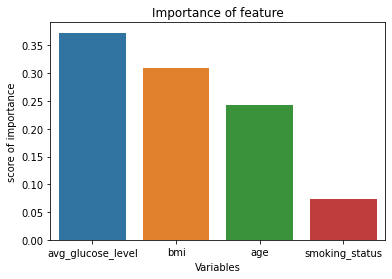

In [29]:
x_train,x_test=features_selection(x_train,x_test,y_train,seuil=0.07)

In [30]:
x_train

,avg_glucose_level,bmi,age,smoking_status
0,0.122649,0.255747,0.353027,0
1,0.128198,0.293103,0.157715,0
2,0.145551,0.528736,0.682617,0
3,0.187594,0.522989,0.365234,3
4,0.166337,0.425287,0.853516,1
...,...,...,...,...
3481,0.348194,0.525862,0.658203,2
3482,0.141601,0.324713,0.597168,0
3483,0.314475,0.158046,0.096680,0
3484,0.016930,0.744253,0.426270,3


In [31]:
seed=1234
class_weight=y_train[y_train==0].size/y_train[y_train==1].size
model_random_=RandomForestClassifier(n_estimators=500,min_samples_split=10,max_leaf_nodes=2,max_depth=20,class_weight={0:1,1:class_weight},random_state=seed,n_jobs=-1)

In [33]:
model_random_.fit(x_train,y_train)
y_pred=model_random_.predict(x_test)
print(classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1421
           1       0.14      0.89      0.24        74

    accuracy                           0.72      1495
   macro avg       0.57      0.80      0.54      1495
weighted avg       0.95      0.72      0.80      1495



In [34]:
x_test_resampled,y_test_resampled,resampler=resampling_data(x_test,y_test,"SMOTE")
y_pred_sampled=model_random_.predict(x_test_resampled)
print(classification_report(y_test_resampled,y_pred_sampled))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1421
           1       0.76      0.92      0.83      1421

    accuracy                           0.82      2842
   macro avg       0.83      0.82      0.81      2842
weighted avg       0.83      0.82      0.81      2842



# Logist

In [73]:
from sklearn.linear_model import LogisticRegression
seed=1234
class_weight=y_train[y_train==0].size/y_train[y_train==1].size
model_logist=LogisticRegression(class_weight={0:1,1:class_weight},random_state=seed,n_jobs=-1,tol=1, C=0.01)

In [74]:
model_logist.fit(x_train,y_train)
y_pred_=model_logist.predict(x_test_resampled)
print(classification_report(y_test_resampled,y_pred_))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1421
           1       0.76      0.93      0.84      1421

    accuracy                           0.82      2842
   macro avg       0.83      0.82      0.82      2842
weighted avg       0.83      0.82      0.82      2842



In [52]:
from sklearn.neural_network  import  MLPClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
mlp= MLPClassifier(random_state=1234, max_iter=10000)
parameters={'hidden_layer_sizes' : [(50,), (100,), (200,)], 
            'activation' : ['identity', 'logistic','tanh','relu'],
           'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_grid=GridSearchCV(mlp, parameters, scoring='f1', cv=5, n_jobs=-1)
mlp_grid.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10000, random_state=1234),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='f1')

In [26]:
# Evaluation of random classifier
y_pred_=mlp_grid.predict(x_test)
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495



C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Evaluation of random classifier
y_pred_sampled=mlp_grid.predict(x_test_resampled)
print(classification_report(y_test_resampled,y_pred_sampled))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1421
           1       0.00      0.00      0.00      1421

    accuracy                           0.50      2842
   macro avg       0.25      0.50      0.33      2842
weighted avg       0.25      0.50      0.33      2842



C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
